# **PHISHING SITES PREDICTION**

## Importing Libraries

In [83]:
import pandas as pd
import numpy as np
import random
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Dataset

In [86]:
urls_data = pd.read_csv("/content/drive/MyDrive/Project.csv")

In [87]:
type(urls_data)

pandas.core.frame.DataFrame

In [88]:
urls_data.head()

,Domain,Have_IP,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Label
0,graphicriver.net,0,1,1,0,0,0,0,1,1,Bad
1,ecnavi.jp,0,1,1,1,0,0,0,1,1,Bad
2,hubpages.com,0,1,1,0,0,0,0,1,0,Bad
3,extratorrent.cc,0,1,3,0,0,0,0,1,0,Bad
4,icicibank.com,0,1,3,0,0,0,0,1,0,Bad


In [89]:
urls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain        10000 non-null  object
 1   Have_IP       10000 non-null  int64 
 2   URL_Length    10000 non-null  int64 
 3   URL_Depth     10000 non-null  int64 
 4   Redirection   10000 non-null  int64 
 5   https_Domain  10000 non-null  int64 
 6   TinyURL       10000 non-null  int64 
 7   DNS_Record    10000 non-null  int64 
 8   Web_Traffic   10000 non-null  int64 
 9   Domain_Age    10000 non-null  int64 
 10  Label         10000 non-null  object
dtypes: int64(9), object(2)
memory usage: 859.5+ KB


## Understanding the data

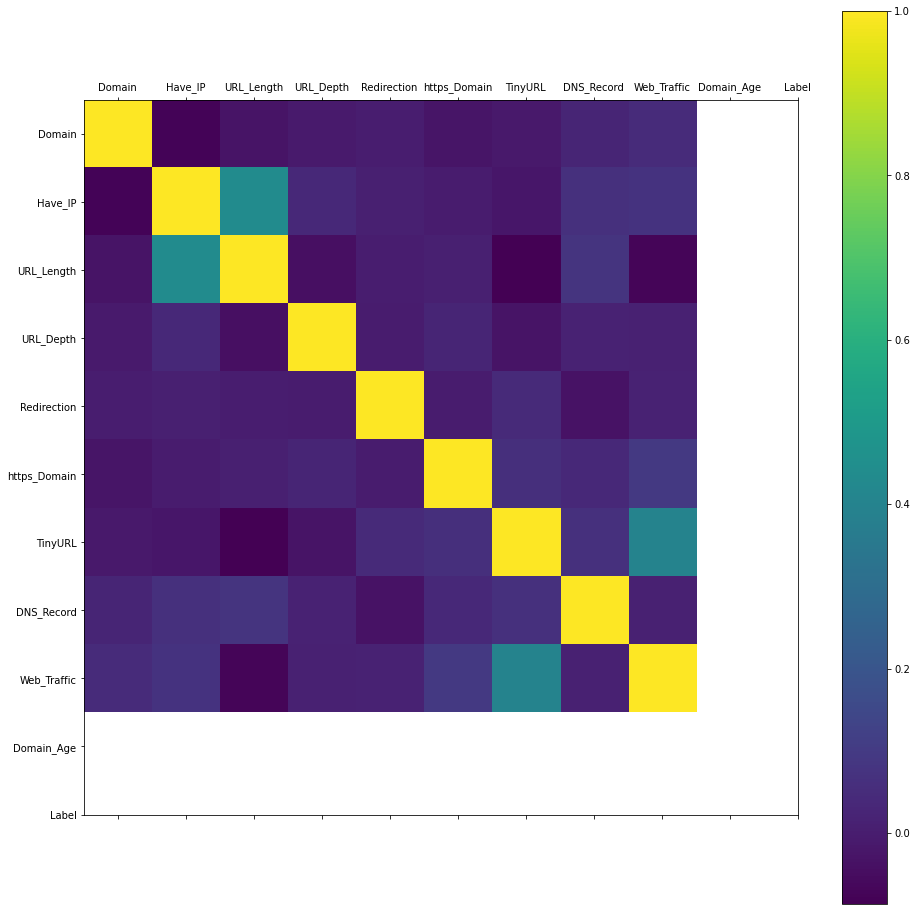

In [90]:
rcParams['figure.figsize'] = 20,18
plt.matshow(urls_data.corr())
plt.yticks(np.arange(urls_data.shape[1]), urls_data.columns)
plt.xticks(np.arange(urls_data.shape[1]), urls_data.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd2083fd90>,
      dtype=object)

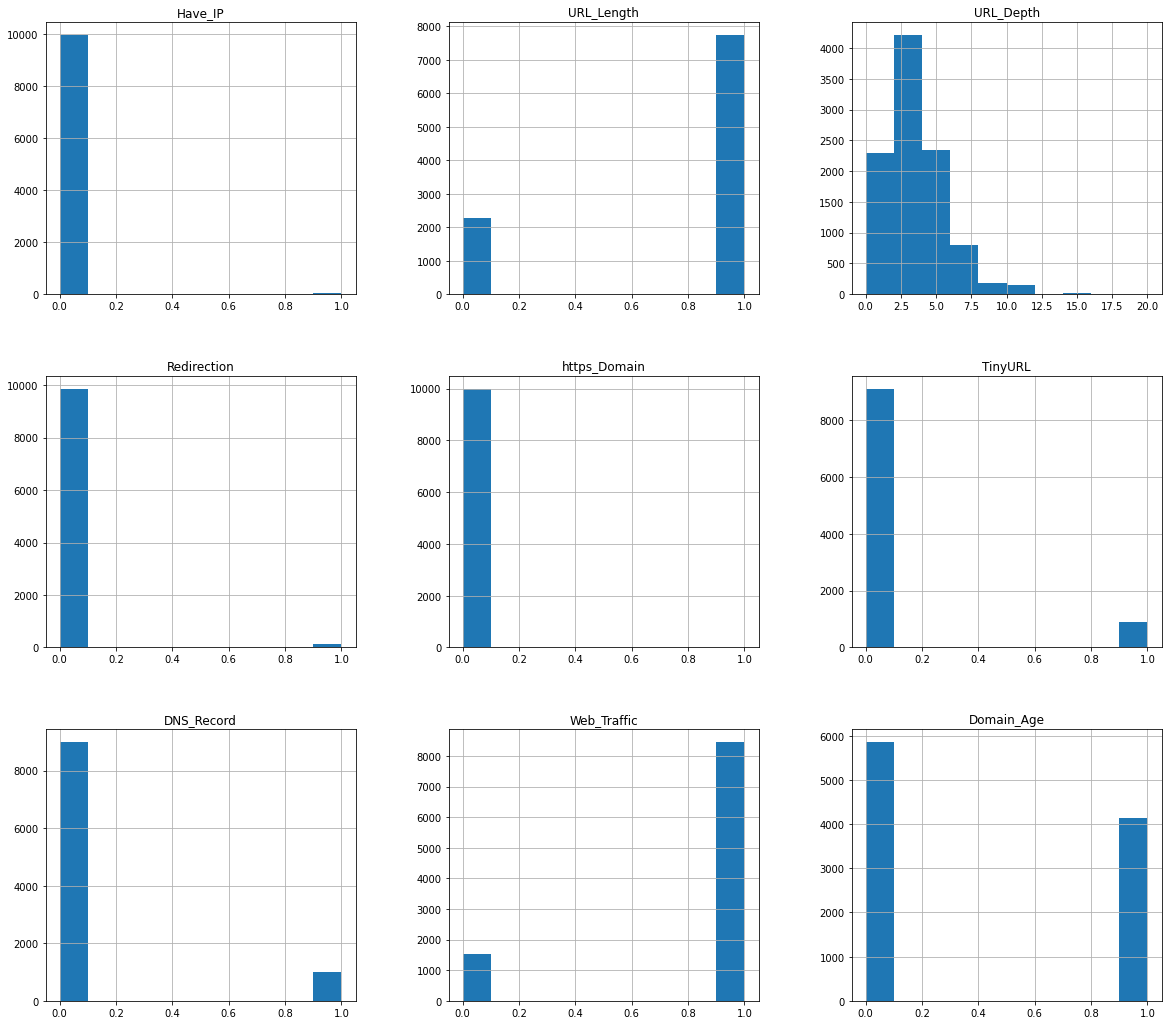

In [91]:
urls_data.hist()

## Phishing Classification

In [92]:
l1 = urls_data.Label.value_counts().index
count = urls_data.Label.value_counts().values

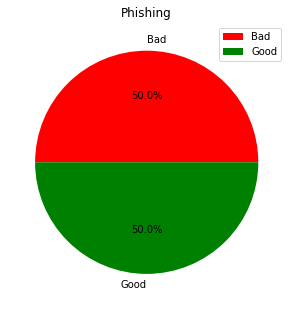

In [93]:
color=['r','g']
explode=(0,0.1)
plt.figure(1,figsize=(5,10))
plt.pie(count,labels=l1,colors=color,autopct='%1.1f%%')
plt.title("Phishing")
plt.legend()
plt.show()

## Tokenization

In [94]:
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/')	# make tokens after splitting by slash
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-')	# make tokens after splitting by dash
        tkns_ByDot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.')	# make tokens after splitting by dot
            tkns_ByDot = tkns_ByDot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tkns_ByDot
    total_Tokens = list(set(total_Tokens))	#remove redundant tokens
    if 'com' in total_Tokens:
        total_Tokens.remove('com')	#removing .com since it occurs a lot of times and it should not be included in our features
    return total_Tokens

In [95]:
y = urls_data["Label"]

In [96]:
url_list = urls_data["Domain"]

In [97]:
vectorizer = TfidfVectorizer(tokenizer=makeTokens)

In [98]:
X = vectorizer.fit_transform(url_list)

### Data Preprocessing

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## CONFUSION MATRIX

In [100]:
def mscore(model):
    print('Training score',model.score(X_train,y_train))
    print('testing  score',model.score(X_test,y_test))
def gen_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    print(cm)
    print(classification_report(y_test,y_pred))
    print('Accuracy Score',accuracy_score(y_test,y_pred))

In [101]:
gen_matrix(y_test,y_pred)

[[976  36]
 [  2 986]]
              precision    recall  f1-score   support

         Bad       1.00      0.96      0.98      1012
        Good       0.96      1.00      0.98       988

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Accuracy Score 0.981


## **Logistic Regression**

In [102]:
logit = LogisticRegression()	
logit.fit(X_train, y_train)
y_pred=logit.predict(X_test)

In [103]:
y_pred

array(['Good', 'Bad', 'Bad', ..., 'Good', 'Bad', 'Good'], dtype=object)

### Accuracy of Logistic Regression

In [104]:
print("Accuracy ",logit.score(X_test, y_test)*100)

Accuracy  98.1


In [105]:
X_predict = ["graphicriver.net","kvsrogurgaon.in",
"ecnavi.jp", "puhjytdesc.com", ]

In [106]:
X_predict = vectorizer.transform(X_predict)
New_predict = logit.predict(X_predict)

In [107]:
print(New_predict)

['Bad' 'Good' 'Bad' 'Good']


In [108]:
X_predict1 = ["stolizaparketa.ru", 
"email302.com",
"sieck-kuehlsysteme.de",
"norcaltc-my.sharepoint.com" ]

In [109]:
X_predict1 = vectorizer.transform(X_predict1)
New_predict1 = logit.predict(X_predict1)
print(New_predict1)

['Good' 'Good' 'Good' 'Good']


In [110]:
vectorizer = TfidfVectorizer()

In [111]:
X = vectorizer.fit_transform(url_list)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
logit = LogisticRegression()	#using logistic regression
logit.fit(X_train, y_train)

LogisticRegression()

In [113]:
print("Accuracy ",logit.score(X_test, y_test)*100)

Accuracy  97.85000000000001


# Decision Tree

In [114]:
dt_scores = []
for i in range(1, len(urls_data.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

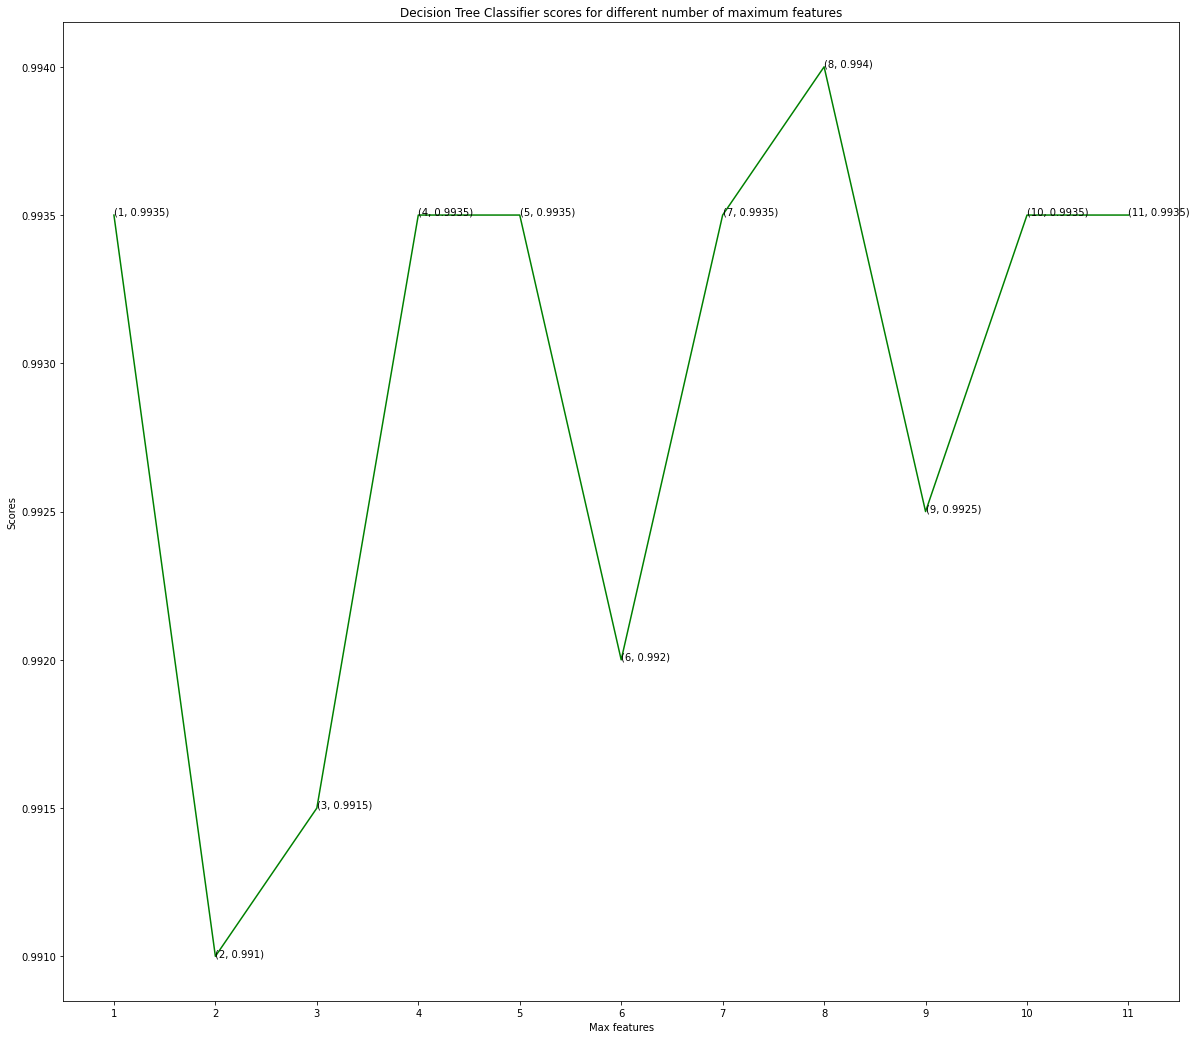

In [115]:
plt.plot([i for i in range(1, len(urls_data.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(urls_data.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(urls_data.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

## **Accuracy Of Decision Tree**

In [116]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[10]*100, [2,4,18]))

The score for Decision Tree Classifier is 99.35000000000001% with [2, 4, 18] maximum features.


## Comparision Analysis

In [117]:
logistic=97.85000000000001
DT=99.25

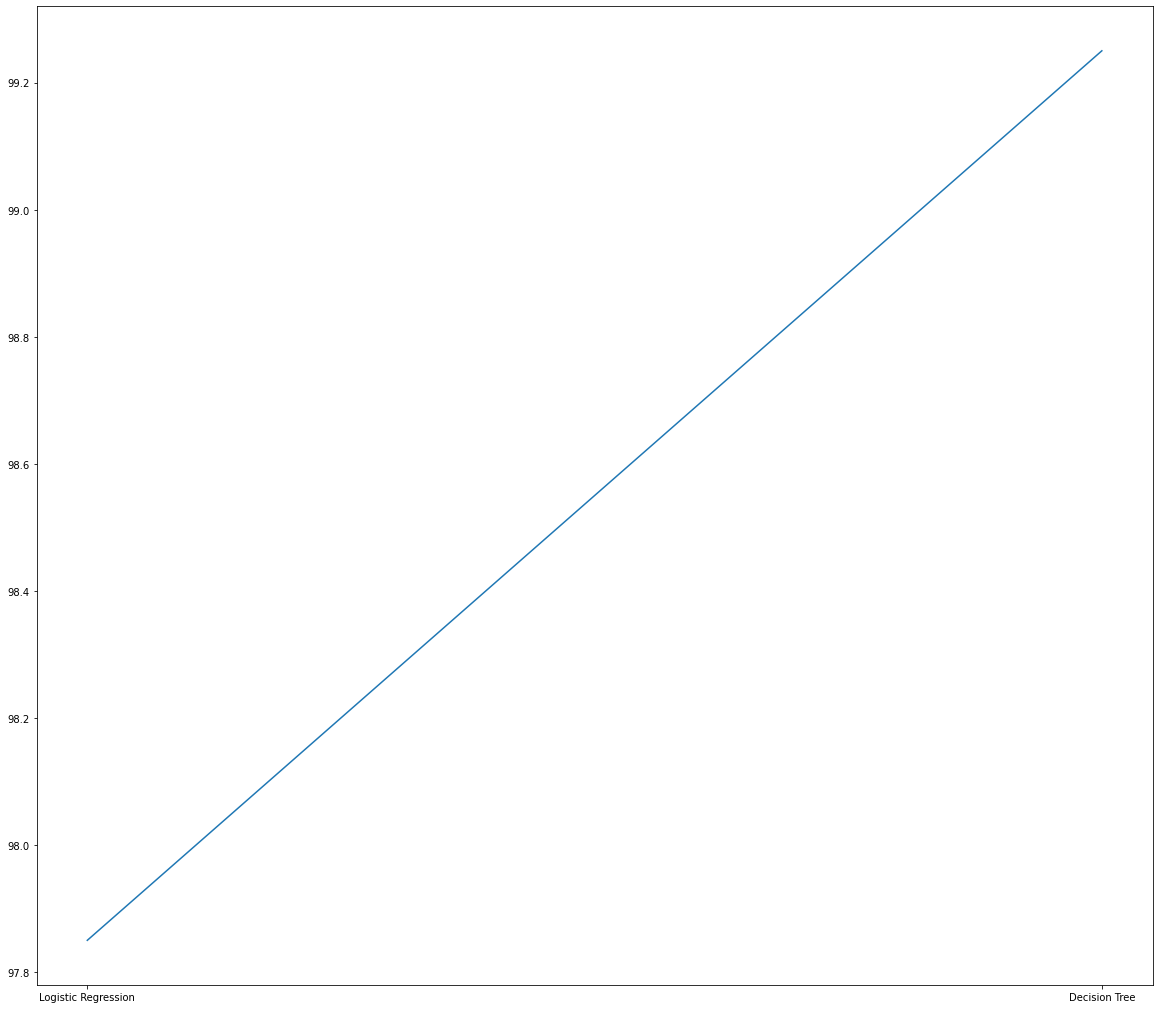

In [118]:
x = np.array(['Logistic Regression','Decision Tree'])
y = [logistic,DT]
plt.plot(x,y)
plt.show()